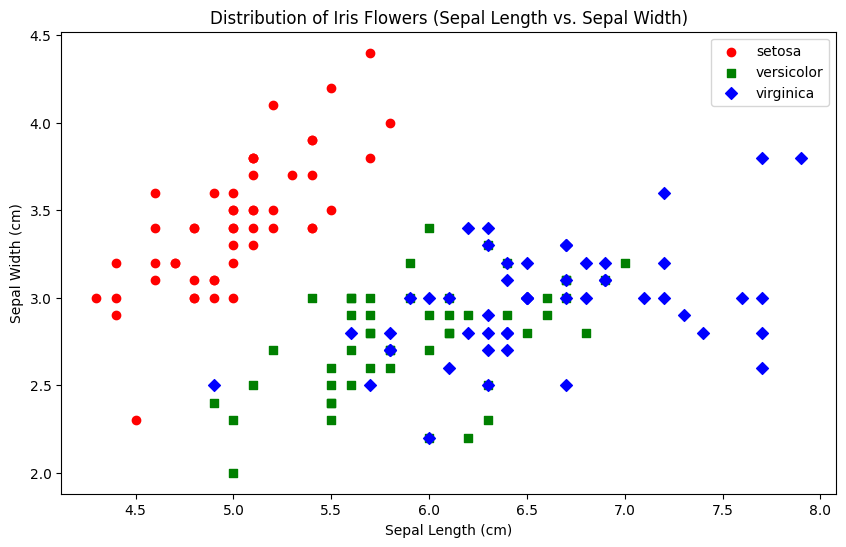

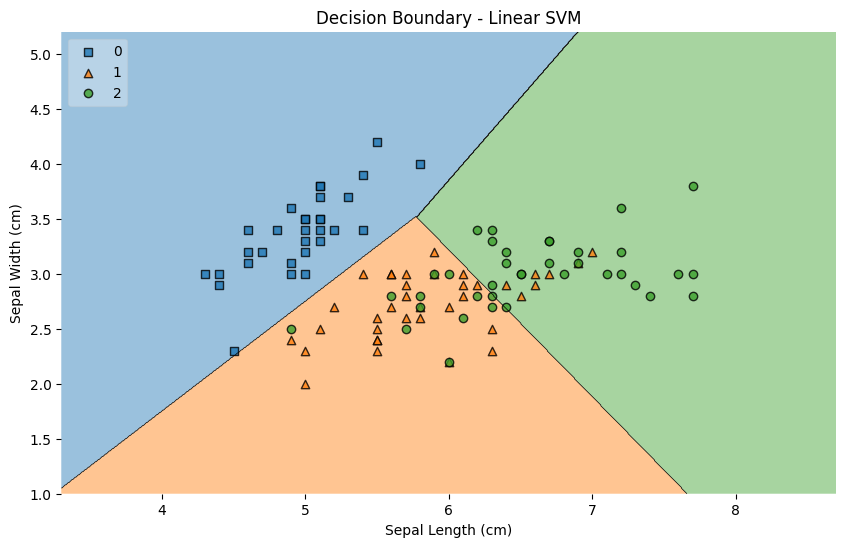

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions  # For plotting decision boundaries

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We are using only sepal length and sepal width
y = iris.target

# Create a DataFrame for easy exploration (optional)
iris_df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names[:2] + ['target'])

# Data Exploration and Visualization
# Scatter plot to visualize the distribution of the three classes
plt.figure(figsize=(10, 6))
markers = ['o', 's', 'D']
colors = ['r', 'g', 'b']
for i, (marker, color) in enumerate(zip(markers, colors)):
    plt.scatter(X[y == i][:, 0], X[y == i][:, 1], marker=marker, color=color, label=iris.target_names[i])

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Distribution of Iris Flowers (Sepal Length vs. Sepal Width)')
plt.legend(loc='best')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier with a linear kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

# Plot the decision boundary for the linear SVM
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train, y_train, clf=svm_linear, legend=2)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Decision Boundary - Linear SVM')
plt.show()


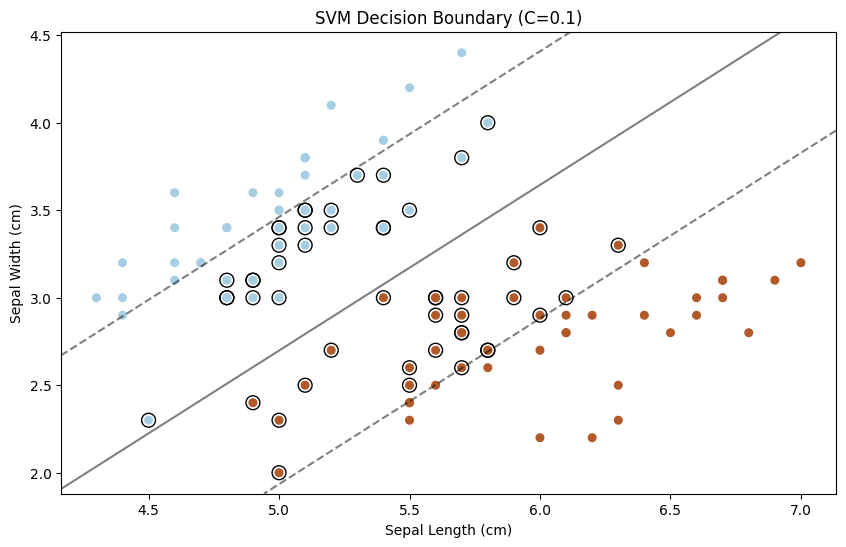

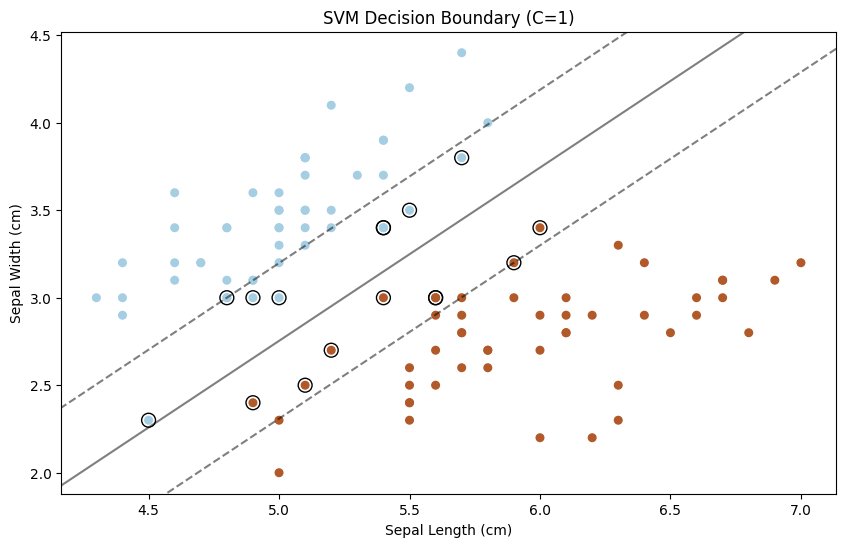

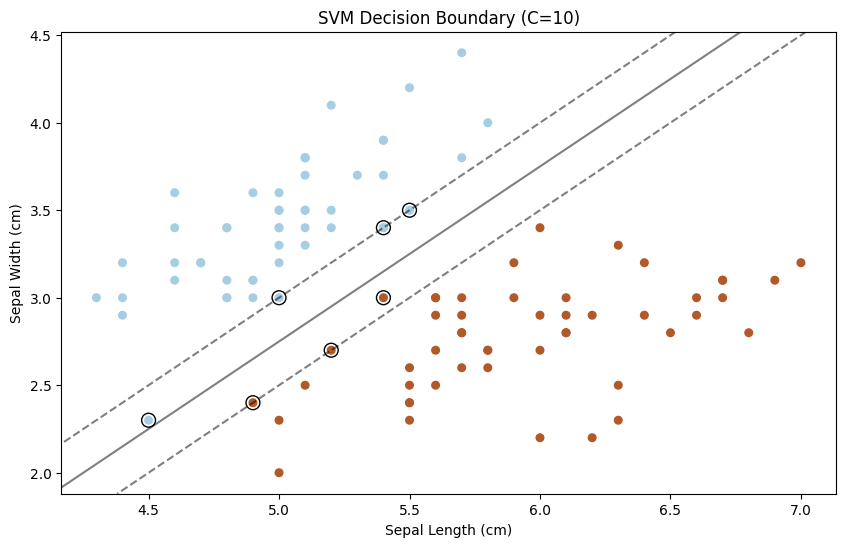

In [2]:
# Create a binary classification problem (for simplicity, we'll use two classes)
X_binary = X[y != 2]  # Select two classes (0 and 1)
y_binary = y[y != 2]

# Create an SVM classifier with a linear kernel
def plot_svm_decision_boundary(C):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_binary, y_binary)

    # Plot the decision boundary, margin, and support vectors
    plt.figure(figsize=(10, 6))
    plt.scatter(X_binary[:, 0], X_binary[:, 1], c=y_binary, cmap=plt.cm.Paired, s=30)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a grid to evaluate the SVM
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = svm.decision_function(xy).reshape(xx.shape)

    # Plot decision boundary and margins
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Highlight support vectors
    ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title(f'SVM Decision Boundary (C={C})')
    plt.show()

# Experiment with different values of regularization parameter C
C_values = [0.1, 1, 10]
for C in C_values:
    plot_svm_decision_boundary(C)

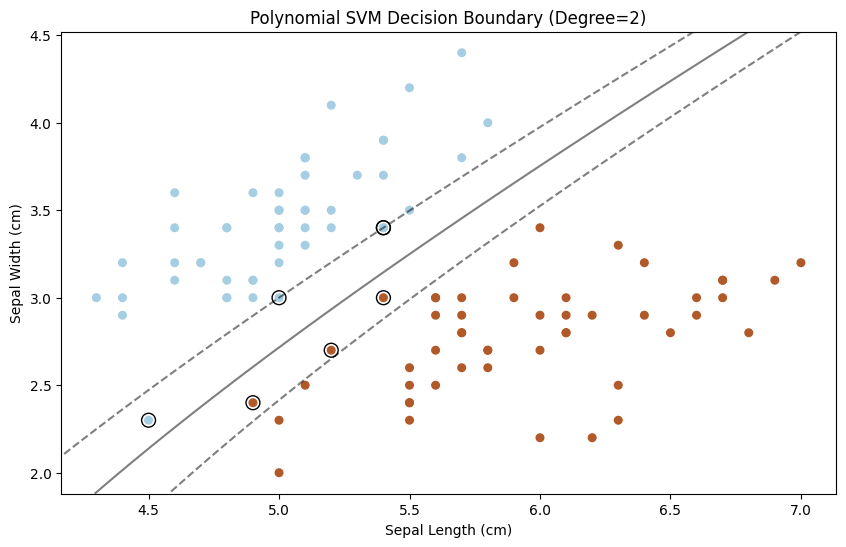

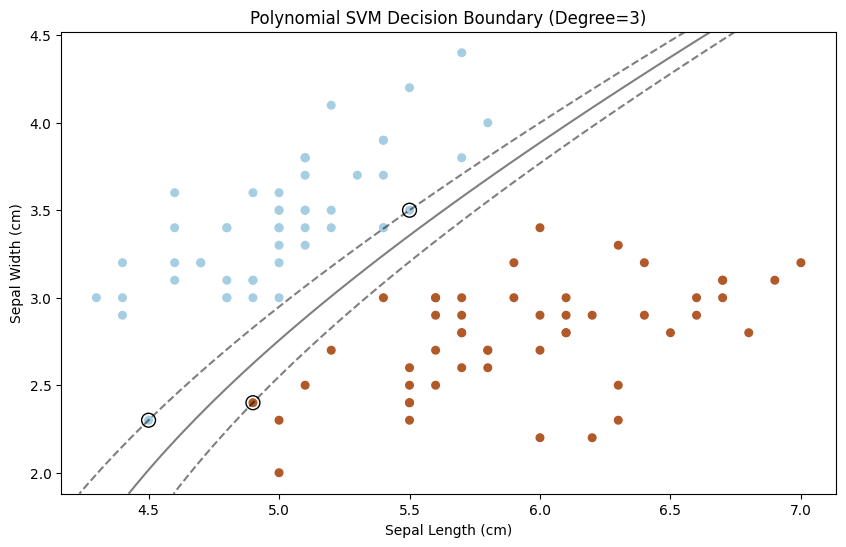

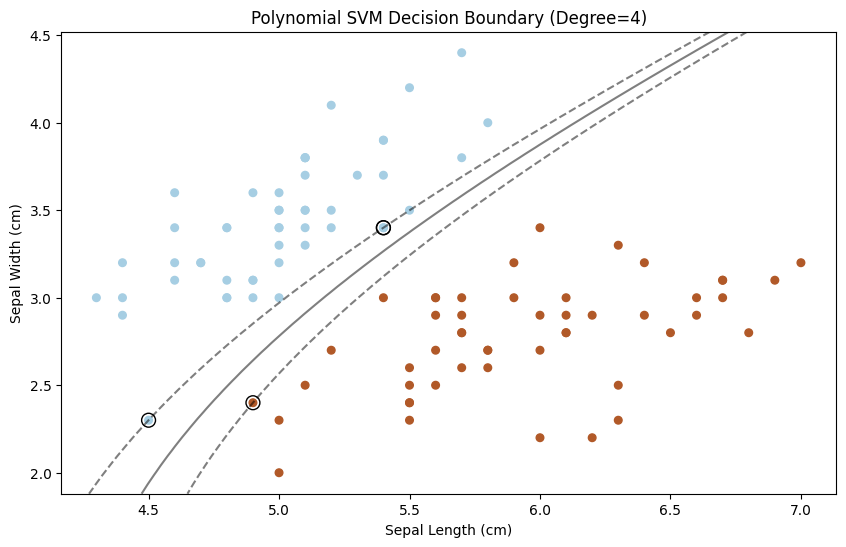

In [3]:
# Create an SVM classifier with a polynomial kernel
def plot_poly_svm_decision_boundary(degree):
    svm_poly = SVC(kernel='poly', degree=degree)
    svm_poly.fit(X_binary, y_binary)

    # Plot the decision boundary and support vectors
    plt.figure(figsize=(10, 6))
    plt.scatter(X_binary[:, 0], X_binary[:, 1], c=y_binary, cmap=plt.cm.Paired, s=30)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a grid to evaluate the SVM
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = svm_poly.decision_function(xy).reshape(xx.shape)

    # Plot decision boundary
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Highlight support vectors
    ax.scatter(svm_poly.support_vectors_[:, 0], svm_poly.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title(f'Polynomial SVM Decision Boundary (Degree={degree})')
    plt.show()

# Experiment with different degrees of the polynomial kernel
degree_values = [2, 3, 4]
for degree in degree_values:
    plot_poly_svm_decision_boundary(degree)

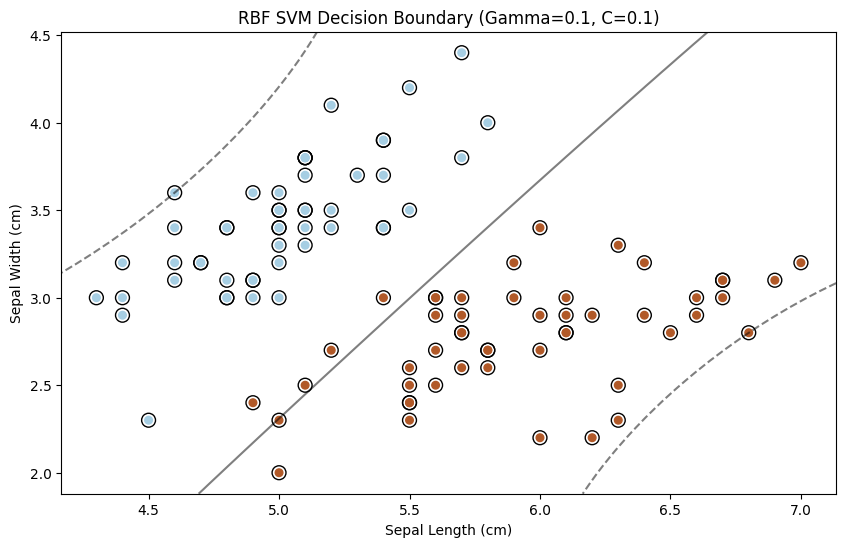

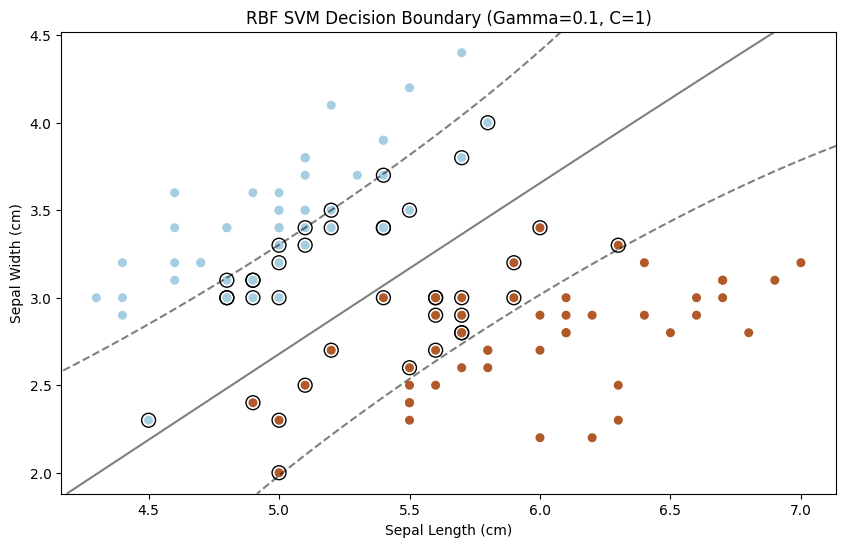

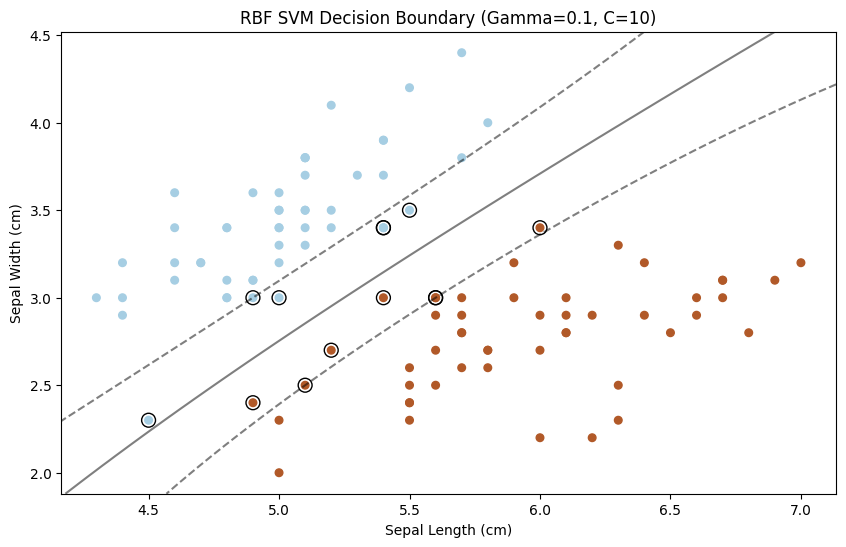

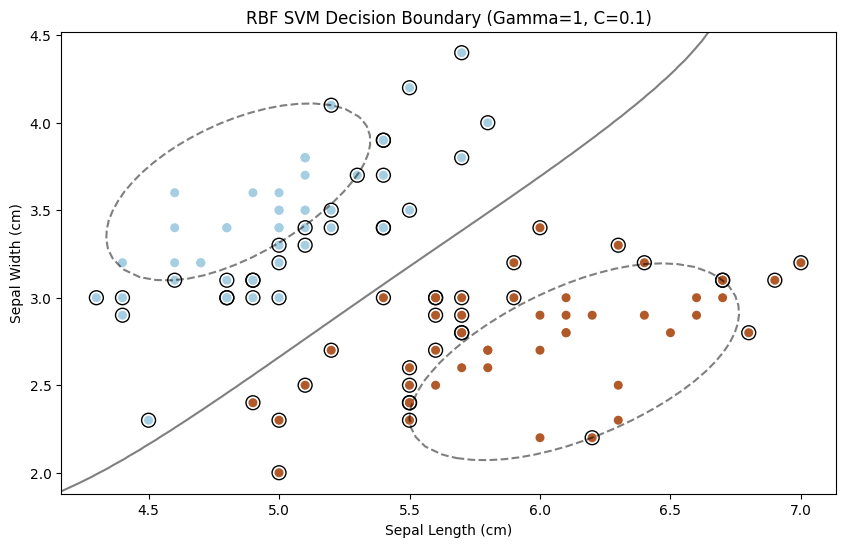

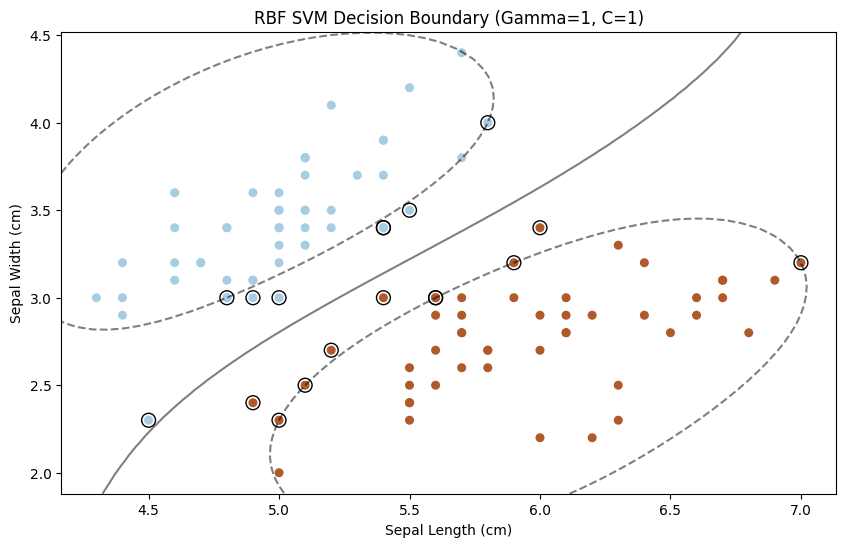

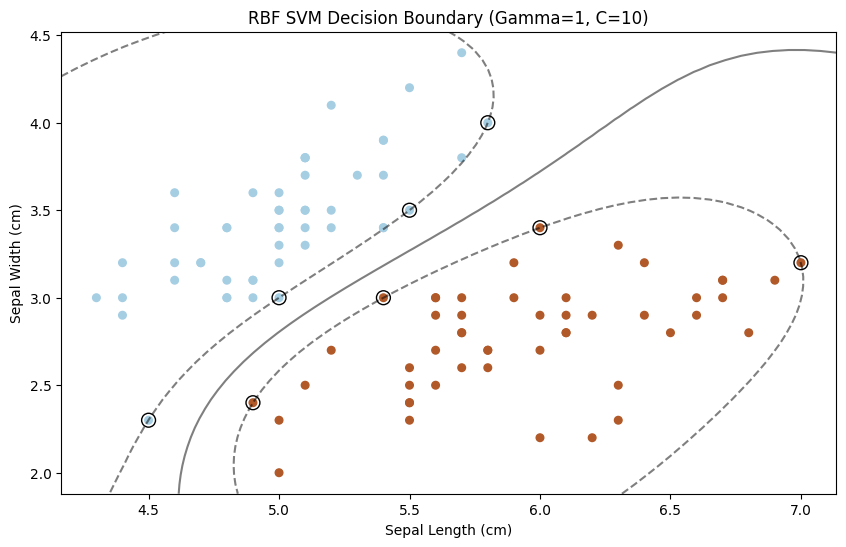

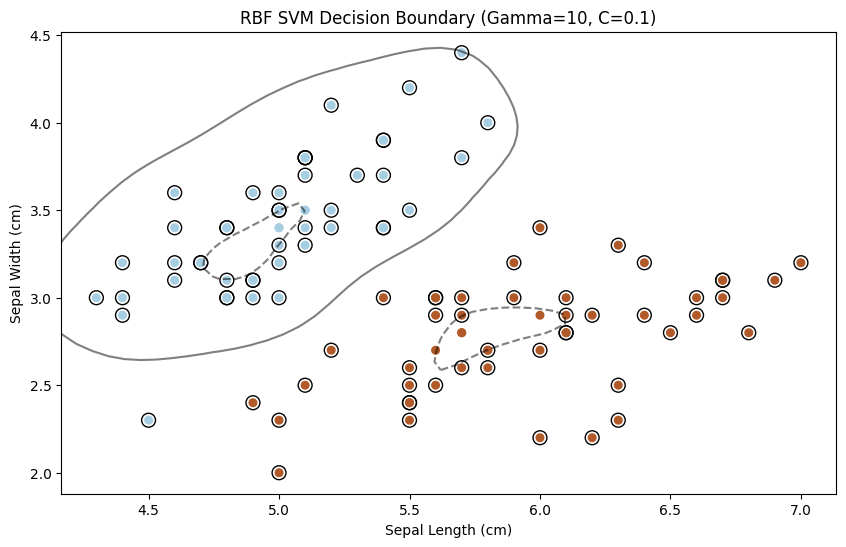

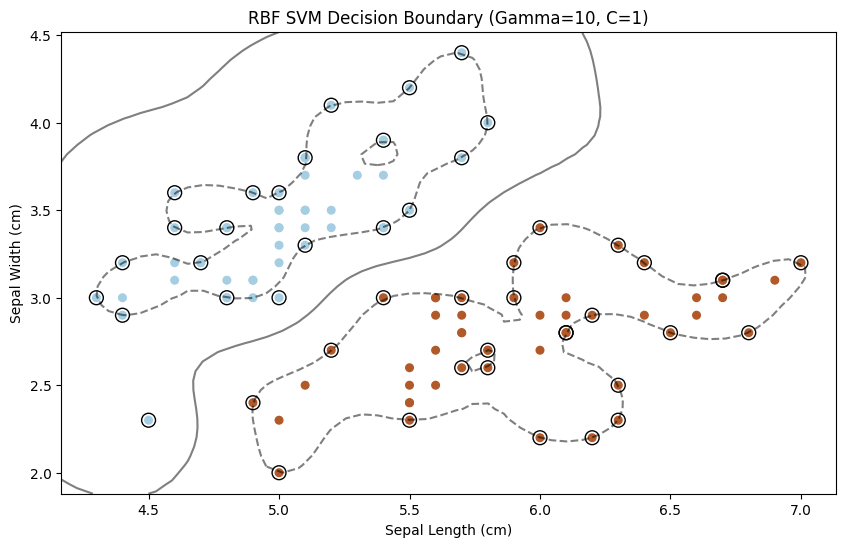

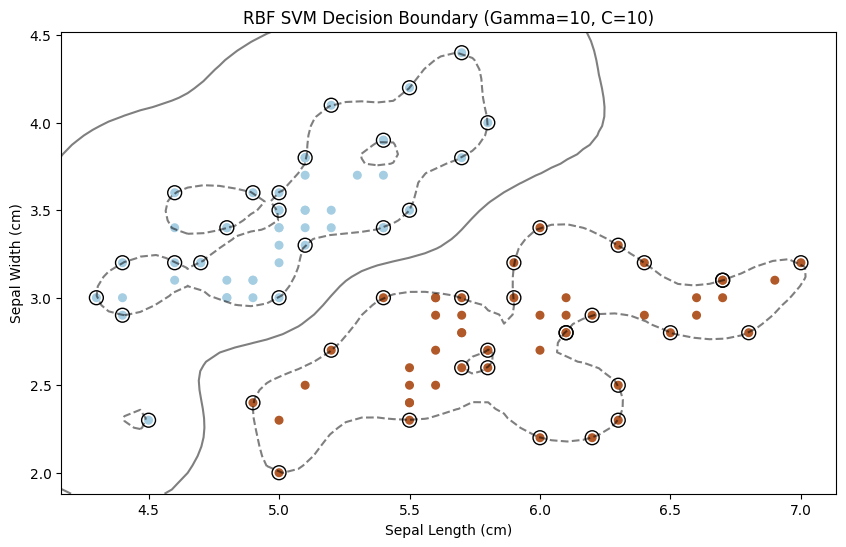

In [4]:
# Create an SVM classifier with an RBF kernel
def plot_rbf_svm_decision_boundary(gamma, C):
    svm_rbf = SVC(kernel='rbf', gamma=gamma, C=C)
    svm_rbf.fit(X_binary, y_binary)

    # Plot the decision boundary and support vectors
    plt.figure(figsize=(10, 6))
    plt.scatter(X_binary[:, 0], X_binary[:, 1], c=y_binary, cmap=plt.cm.Paired, s=30)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a grid to evaluate the SVM
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = svm_rbf.decision_function(xy).reshape(xx.shape)

    # Plot decision boundary
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Highlight support vectors
    ax.scatter(svm_rbf.support_vectors_[:, 0], svm_rbf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title(f'RBF SVM Decision Boundary (Gamma={gamma}, C={C})')
    plt.show()

# Experiment with different values of gamma and regularization parameter C
gamma_values = [0.1, 1, 10]
C_values = [0.1, 1, 10]
for gamma in gamma_values:
    for C in C_values:
        plot_rbf_svm_decision_boundary(gamma, C)


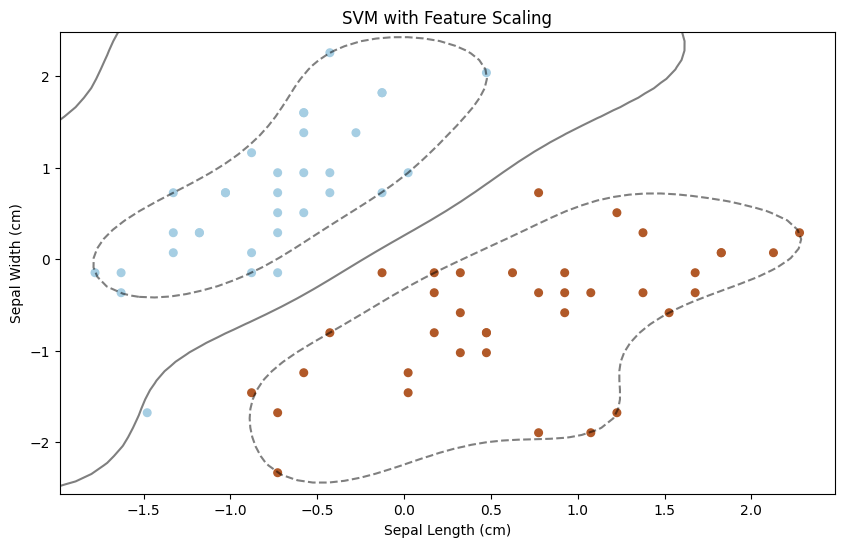

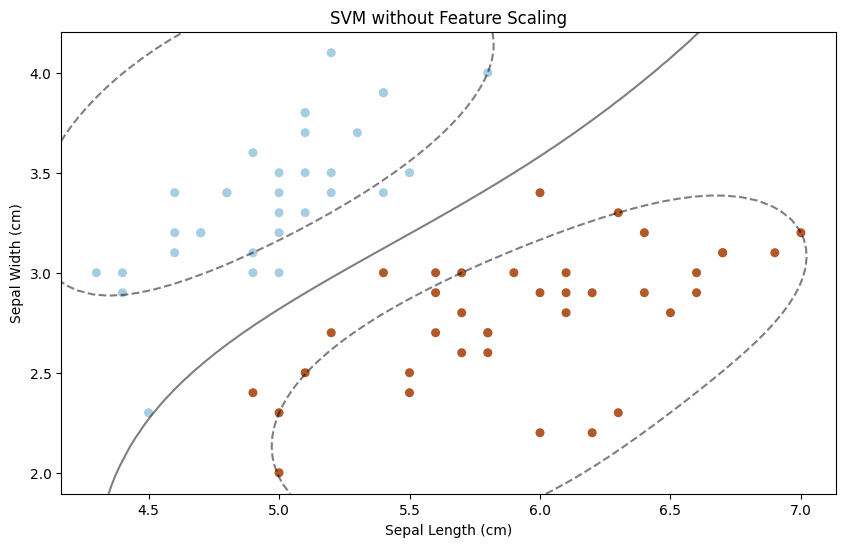

Accuracy with Feature Scaling: 1.00
Accuracy without Feature Scaling: 1.00


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

# Create SVM classifiers with an RBF kernel (one with feature scaling, one without)
svm_with_scaling = SVC(kernel='rbf', gamma=1, C=1)
svm_without_scaling = SVC(kernel='rbf', gamma=1, C=1)

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with scaling
svm_with_scaling.fit(X_train_scaled, y_train)

# Train SVM without scaling
svm_without_scaling.fit(X_train, y_train)

# Function to visualize decision boundaries
def plot_decision_boundary(clf, X, y, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=30)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a grid to evaluate the SVM
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = clf.decision_function(xy).reshape(xx.shape)

    # Plot decision boundary
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title(title)
    plt.show()

# Visualize decision boundaries for SVM classifiers
plot_decision_boundary(svm_with_scaling, X_train_scaled, y_train, 'SVM with Feature Scaling')
plot_decision_boundary(svm_without_scaling, X_train, y_train, 'SVM without Feature Scaling')

# Evaluate and compare performance
y_pred_with_scaling = svm_with_scaling.predict(X_test_scaled)
y_pred_without_scaling = svm_without_scaling.predict(X_test)

accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)
accuracy_without_scaling = accuracy_score(y_test, y_pred_without_scaling)

print(f'Accuracy with Feature Scaling: {accuracy_with_scaling:.2f}')
print(f'Accuracy without Feature Scaling: {accuracy_without_scaling:.2f}')


Accuracy of Linear SVM: 1.00
Accuracy of Polynomial SVM: 1.00
Accuracy of RBF SVM: 1.00


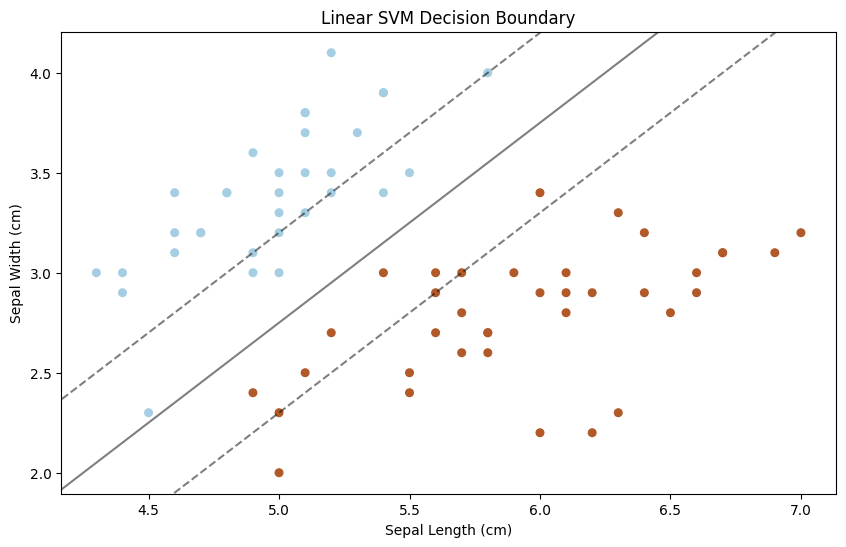

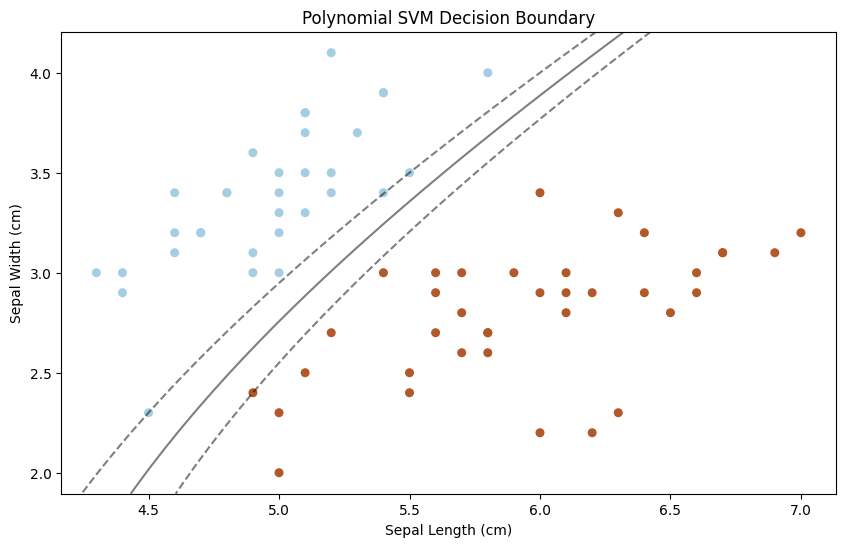

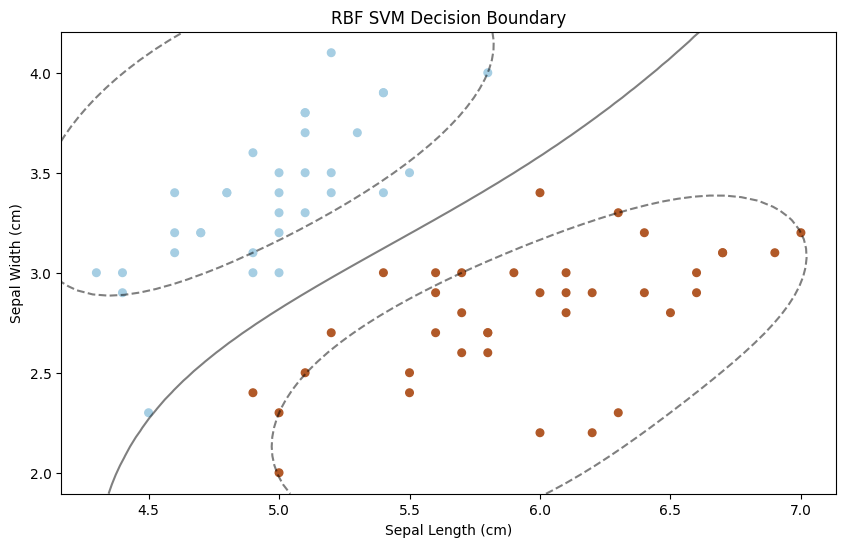

In [9]:
# Create SVM classifiers with different kernels
svm_linear = SVC(kernel='linear', C=1)
svm_poly = SVC(kernel='poly', degree=3, C=1)
svm_rbf = SVC(kernel='rbf', gamma=1, C=1)

# Train SVM classifiers
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Evaluate the performance of SVM classifiers
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Print accuracy scores
print(f'Accuracy of Linear SVM: {accuracy_linear:.2f}')
print(f'Accuracy of Polynomial SVM: {accuracy_poly:.2f}')
print(f'Accuracy of RBF SVM: {accuracy_rbf:.2f}')

# Plot decision boundaries
def plot_decision_boundary(clf, X, y, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=30)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a grid to evaluate the SVM
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = clf.decision_function(xy).reshape(xx.shape)

    # Plot decision boundary
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title(title)
    plt.show()

# Plot decision boundaries for different SVM kernels
plot_decision_boundary(svm_linear, X_train, y_train, 'Linear SVM Decision Boundary')
plot_decision_boundary(svm_poly, X_train, y_train, 'Polynomial SVM Decision Boundary')
plot_decision_boundary(svm_rbf, X_train, y_train, 'RBF SVM Decision Boundary')
